In [105]:
import pandas as pd
import numpy as np

In [106]:
train_df = pd.read_csv('Mercedes_train.csv')

In [107]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [108]:
train_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [109]:
#Checking for null values in train dataset

train_df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [110]:
train_df.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [111]:
train_df["ID"] = train_df["ID"].astype("category")

In [112]:
train_df.dtypes

ID      category
y        float64
X0        object
X1        object
X2        object
          ...   
X380       int64
X382       int64
X383       int64
X384       int64
X385       int64
Length: 378, dtype: object

In [113]:
#Checking for columns variance

def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [114]:
var_zero_cols(train_df)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [115]:
var_df=pd.DataFrame(train_df.var(),columns=['Variance'])

In [116]:
#Removing the above columns for 0 variance

train_df.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)

In [117]:
#Checking for unique value in train dataset

train_ucnt=pd.DataFrame(train_df.nunique(),columns=['uniqueCount'])

In [118]:
train_ucnt[train_ucnt.uniqueCount>2]

,uniqueCount
ID,4209
y,2545
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [119]:
train_ucnt[train_ucnt.uniqueCount<=2]

,uniqueCount
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


In [120]:
#Analyzing variables with unique counts >2
#Analyzing X0

train_df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
l      16
aw     16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
ab      1
g       1
Name: X0, dtype: int64

<AxesSubplot:xlabel='X0', ylabel='y'>

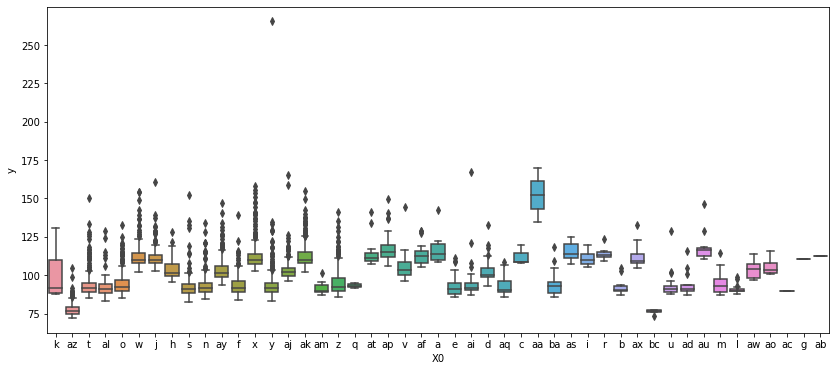

In [121]:
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X0,y=train_df.y)

<AxesSubplot:xlabel='X0', ylabel='y'>

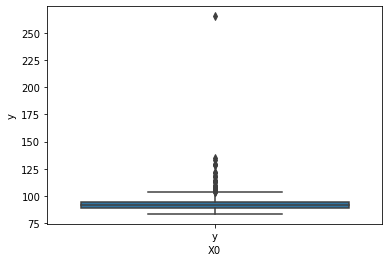

In [122]:
sns.boxplot(x=train_df.X0[train_df.X0=='y'],y=train_df.y)

In [123]:
((train_df[train_df.X0=='y']['y']).sort_values(ascending=False))[:1].index.values

array([883])

In [124]:
train_df.drop(labels=((train_df[train_df.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)

<AxesSubplot:xlabel='X0', ylabel='y'>

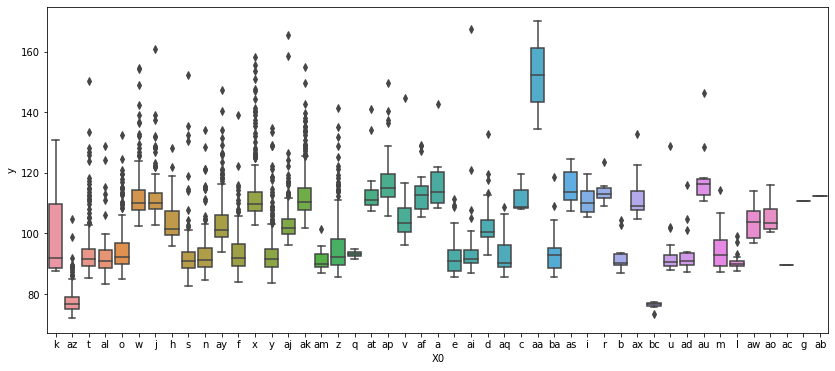

In [125]:
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X0,y=train_df.y)

In [126]:
train_df.X0.value_counts()

z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
l      16
aw     16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
ab      1
g       1
Name: X0, dtype: int64

In [127]:
def transform_X0(df):
    x0_grp=df.groupby('X0').aggregate(func='count')['ID'].reset_index()
    df['X0'].replace(to_replace=x0_grp[x0_grp['ID']<100]['X0'].values,value='OT',inplace=True)

In [128]:
transform_X0(train_df)

In [129]:
train_df.X0.value_counts()

OT    668
z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
Name: X0, dtype: int64

<AxesSubplot:xlabel='X0', ylabel='y'>

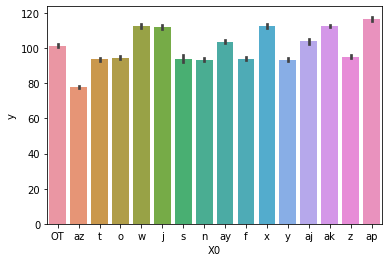

In [130]:
sns.barplot(x=train_df.X0,y=train_df.y)

In [131]:
#Analyzing X1

train_df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
ab      3
q       3
d       3
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

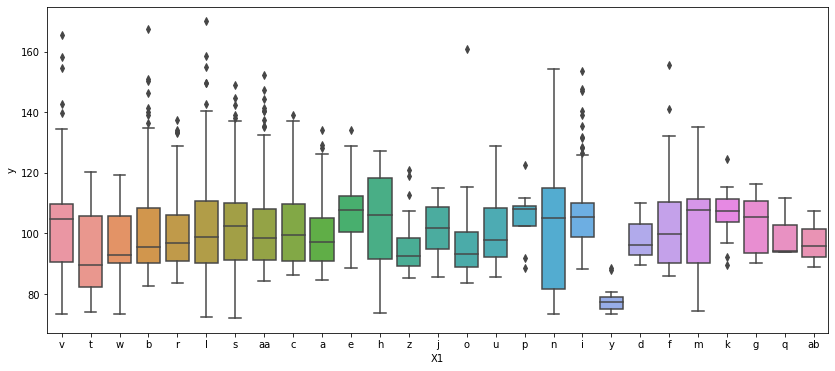

In [132]:
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X1,y=train_df.y)

In [133]:
def transform_X1(df):
    x1_grp=df.groupby('X1').aggregate(func='count')['ID'].reset_index()
    df['X1'].replace(to_replace=x1_grp[x1_grp['ID']<100]['X1'].values,value='OT',inplace=True)

In [134]:
transform_X1(train_df)

In [135]:
train_df.X1.value_counts()

aa    833
s     598
b     592
l     590
OT    470
v     408
r     250
i     203
a     143
c     121
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

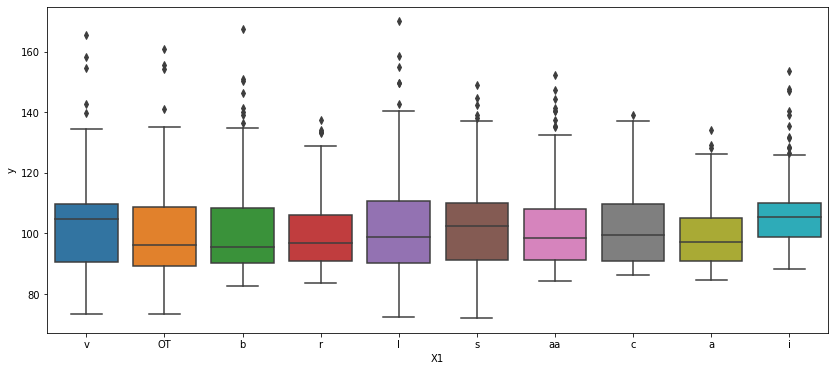

In [136]:
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X1,y=train_df.y)

<AxesSubplot:xlabel='X1', ylabel='y'>

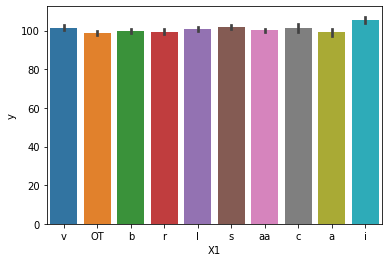

In [137]:
sns.barplot(x=train_df.X1,y=train_df.y)

In [138]:
#Analyzing X3

train_df.X3.value_counts()

c    1942
f    1075
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

<AxesSubplot:xlabel='X3', ylabel='y'>

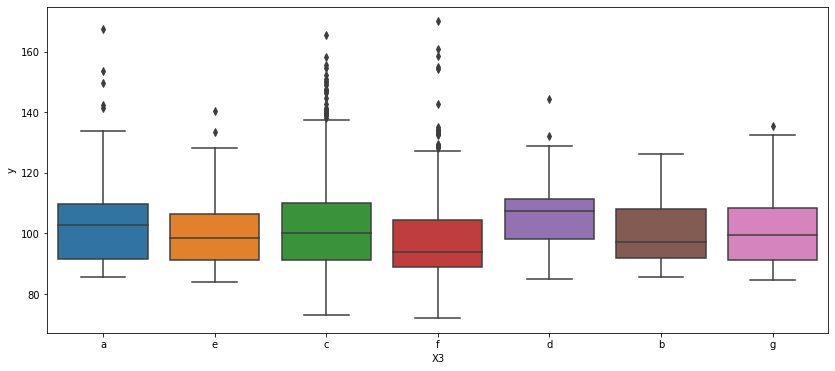

In [139]:
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X3,y=train_df.y)

<AxesSubplot:xlabel='X3', ylabel='y'>

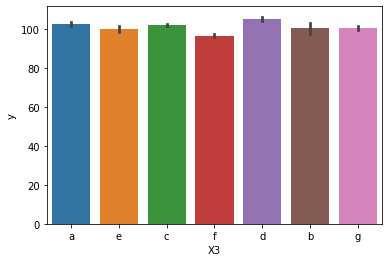

In [140]:
sns.barplot(x=train_df.X3,y=train_df.y)

In [141]:
#Analyzing X4

train_df.X4.value_counts()

d    4204
a       2
c       1
b       1
Name: X4, dtype: int64

In [142]:
#Transforming X4 to the data d and not d

train_df[train_df.X4!='d']['X4'].values

array(['b', 'c', 'a', 'a'], dtype=object)

In [143]:
def transform_X4(df):
    df['X4'].replace(to_replace=df[df.X4!='d']['X4'].values,value='~d',inplace=True)

In [144]:
transform_X4(train_df)

In [145]:
train_df.X4.value_counts()

d     4204
~d       4
Name: X4, dtype: int64

<AxesSubplot:xlabel='X4', ylabel='y'>

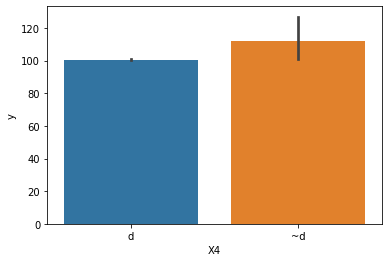

In [146]:
sns.barplot(x=train_df.X4,y=train_df.y)

In [147]:
#Analyzing X5

train_df.X5.value_counts()

w     231
v     231
q     220
r     215
d     214
s     214
n     212
m     208
p     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
y       1
h       1
u       1
g       1
Name: X5, dtype: int64

In [148]:
def transform_X5(df):
    x5_grp=df.groupby('X5').aggregate(func='count')['ID'].reset_index()
    df['X5'].replace(to_replace=x5_grp[x5_grp['ID']<100]['X5'].values,value='OT',inplace=True)

In [149]:
transform_X5(train_df)

In [150]:
train_df.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
p     208
m     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
OT    130
j     125
aa    112
Name: X5, dtype: int64

<AxesSubplot:xlabel='X5', ylabel='y'>

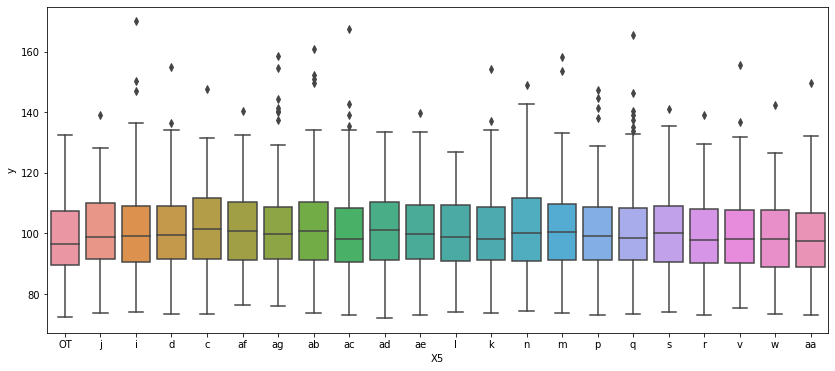

In [151]:
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.X5,y=train_df.y)

<AxesSubplot:xlabel='X5', ylabel='y'>

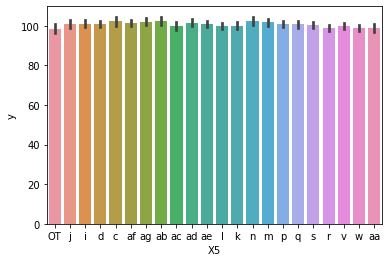

In [152]:
sns.barplot(x=train_df.X5,y=train_df.y)

In [153]:
#Analyzing X6

train_df.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     477
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

<AxesSubplot:xlabel='X6', ylabel='y'>

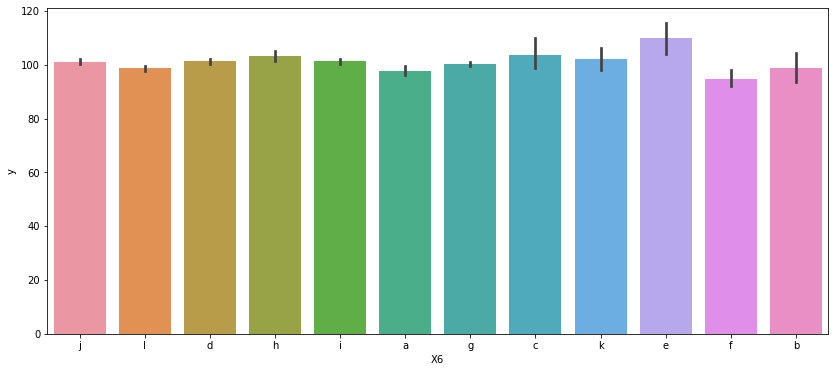

In [154]:
plt.figure(figsize=(14,6))
sns.barplot(x=train_df.X6,y=train_df.y)

In [155]:
#Analyzing X8

train_df.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    118
q    117
h    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

<AxesSubplot:xlabel='X8', ylabel='y'>

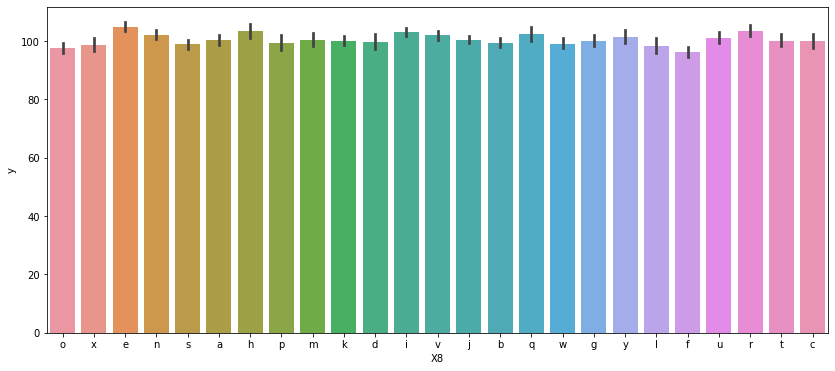

In [156]:
plt.figure(figsize=(14,6))
sns.barplot(x=train_df.X8,y=train_df.y)

In [157]:
#Applying Label Encoder on categorical features to convert them into numerical

from sklearn.preprocessing import LabelEncoder

In [158]:
x=train_df.drop(columns='y')
y=train_df.y

In [159]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,OT,v,at,a,d,OT,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,OT,OT,av,e,d,OT,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,OT,n,c,d,OT,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,OT,n,f,d,OT,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,OT,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df_cat=train_df.select_dtypes(include="object").columns

In [161]:
df_cat

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [162]:
def transform_labels(df,x):
    df_cat=df.select_dtypes(include="object").columns
    le=LabelEncoder()
    for i in df_cat:
        le.fit(x[i])
        x[i]=le.transform(x[i])

In [163]:
transform_labels(train_df,x)

In [164]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,9,17,0,0,0,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,19,4,0,0,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,5,0,34,2,0,0,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,5,0,34,5,0,0,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,5,9,34,5,0,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
#df_num = merc_train.select_dtypes(include=["float64", "int64"])

In [166]:
#from sklearn.preprocessing import MinMaxScaler

In [167]:
#mn = MinMaxScaler()
#df_num_sc = mn.fit_transform(df_num)

In [168]:
#df_num_df = pd.DataFrame(df_num_sc, index=df_num.index, columns=df_num.columns)

In [169]:
#Performing PCA

from sklearn.decomposition import PCA

In [170]:
pcaModel=PCA()

In [171]:
pcaModel.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [172]:
pcaModel.explained_variance_ratio_

array([9.99955823e-01, 2.02031274e-05, 8.27667759e-06, 4.71581853e-06,
       4.10984489e-06, 1.56398011e-06, 1.35712049e-06, 6.84232687e-07,
       3.74995735e-07, 2.76672393e-07, 2.19715927e-07, 2.07779711e-07,
       1.83664337e-07, 1.51466846e-07, 1.31700482e-07, 1.15328477e-07,
       9.26779299e-08, 8.71780908e-08, 7.61437627e-08, 7.02787075e-08,
       6.33831541e-08, 5.82102981e-08, 5.66250743e-08, 5.12223311e-08,
       4.59628637e-08, 4.35647271e-08, 3.90046984e-08, 3.72616148e-08,
       3.40363069e-08, 3.23086142e-08, 3.13806920e-08, 2.88308323e-08,
       2.81535023e-08, 2.63693700e-08, 2.57326121e-08, 2.43771146e-08,
       2.23981286e-08, 2.08792599e-08, 1.93239882e-08, 1.86595424e-08,
       1.76475558e-08, 1.69603739e-08, 1.61863569e-08, 1.58910084e-08,
       1.54263656e-08, 1.51046694e-08, 1.36777039e-08, 1.33847659e-08,
       1.29593011e-08, 1.26448189e-08, 1.22608871e-08, 1.22260219e-08,
       1.17827282e-08, 1.13101376e-08, 1.06150305e-08, 1.02315367e-08,
      

In [173]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([ 99.9955823 ,  99.99760261,  99.99843028,  99.99890186,
        99.99931285,  99.99946925,  99.99960496,  99.99967338,
        99.99971088,  99.99973855,  99.99976052,  99.9997813 ,
        99.99979966,  99.99981481,  99.99982798,  99.99983951,
        99.99984878,  99.9998575 ,  99.99986511,  99.99987214,
        99.99987848,  99.9998843 ,  99.99988996,  99.99989509,
        99.99989968,  99.99990404,  99.99990794,  99.99991167,
        99.99991507,  99.9999183 ,  99.99992144,  99.99992432,
        99.99992714,  99.99992977,  99.99993235,  99.99993478,
        99.99993702,  99.99993911,  99.99994104,  99.99994291,
        99.99994468,  99.99994637,  99.99994799,  99.99994958,
        99.99995112,  99.99995263,  99.999954  ,  99.99995534,
        99.99995663,  99.9999579 ,  99.99995912,  99.99996035,
        99.99996153,  99.99996266,  99.99996372,  99.99996474,
        99.99996571,  99.99996667,  99.99996761,  99.99996853,
        99.99996941,  99.99997024,  99.99997106,  99.99

In [174]:
pcaModel.components_

array([[ 9.99998692e-01, -5.05241452e-05,  6.52198546e-05, ...,
        -1.56204891e-07, -1.37374861e-07,  4.49791750e-07],
       [ 9.78264751e-05, -4.32766924e-02,  3.61512507e-02, ...,
        -8.08001994e-05, -6.68612003e-06, -1.80232582e-05],
       [-3.32068350e-05,  2.60907543e-02, -1.38988584e-02, ...,
         2.09750464e-04,  2.81531175e-05,  2.32822698e-04],
       ...,
       [ 0.00000000e+00,  8.80631398e-18,  5.10282951e-18, ...,
        -2.14129929e-17,  1.05140506e-16, -4.47075916e-02],
       [ 0.00000000e+00,  1.63099425e-17,  5.28279038e-18, ...,
         4.78133158e-17,  8.70885395e-17,  2.30979668e-02],
       [ 0.00000000e+00, -8.59230222e-16, -3.23268892e-16, ...,
        -7.24359808e-14, -8.96973468e-14, -2.24584169e-03]])

In [175]:
pcaModel=PCA(n_components=120)

In [176]:
x.drop(columns=['ID'],inplace=True)

In [177]:
pcaModel.fit(x)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [178]:
x_pca=pd.DataFrame(pcaModel.transform(x))

In [179]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([43.1998066 , 60.8938594 , 75.2247611 , 85.30276091, 88.6459392 ,
       91.5468846 , 93.01091725, 93.8126853 , 94.40411854, 94.87389142,
       95.31840364, 95.71152368, 96.03608435, 96.31761122, 96.56431308,
       96.76272104, 96.94902682, 97.11260937, 97.26280796, 97.39831897,
       97.52304452, 97.6441231 , 97.75370923, 97.8520118 , 97.94565995,
       98.02914534, 98.10879036, 98.1815388 , 98.25091216, 98.31797932,
       98.37959819, 98.43976977, 98.49614063, 98.55128592, 98.60349218,
       98.65140497, 98.69605446, 98.7373834 , 98.77739481, 98.81512074,
       98.8515064 , 98.88617091, 98.92018397, 98.95319717, 98.9858438 ,
       99.01508067, 99.04383862, 99.07154449, 99.09859107, 99.12485681,
       99.15098463, 99.17621683, 99.20038738, 99.22308156, 99.2449524 ,
       99.26581685, 99.28634895, 99.30634408, 99.32596393, 99.34486869,
       99.36261243, 99.38016081, 99.39674994, 99.41328222, 99.42861605,
       99.44359071, 99.45807465, 99.47246801, 99.48605168, 99.49

In [180]:
pcaModel.components_

array([[-4.28752202e-02,  3.57029823e-02,  9.92960039e-01, ...,
        -7.98656974e-05, -6.09968323e-06, -2.09839271e-05],
       [ 2.48295675e-02, -1.28040733e-02,  7.81224831e-02, ...,
         2.07694272e-04,  2.81316388e-05,  2.39828219e-04],
       [ 3.77244314e-02, -2.87052731e-02, -6.61920907e-03, ...,
         5.10397785e-05, -1.92373784e-05, -1.87643318e-04],
       ...,
       [-1.91857852e-03, -3.89556066e-03,  2.91685847e-04, ...,
        -1.45664411e-02,  4.88350770e-03,  4.16422362e-03],
       [-1.92905203e-03, -6.48459987e-04, -7.03704272e-04, ...,
         1.52879894e-02,  2.30246968e-03,  4.75004644e-02],
       [-1.87781535e-04,  3.02786082e-03, -5.64005771e-04, ...,
         1.26929836e-02,  1.74892258e-02, -2.17123251e-02]])

In [181]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.360851,1.626849,10.934988,-8.098682,0.692279,-3.559976,4.046201,-2.356005,0.373682,0.983612,...,-0.022015,0.371419,-0.386977,-0.204411,-0.457554,0.670916,-0.150586,0.034226,-0.117401,-0.393668
1,1.862021,1.893737,11.162599,-6.713501,-6.213841,-0.031852,-2.025817,-0.758965,1.681262,-1.063300,...,-0.074963,0.132830,0.140855,0.408935,0.088409,-0.021094,0.034972,0.147224,-0.135702,-0.012477
2,16.011201,12.165398,11.671780,-1.796760,-4.314091,1.720922,-0.918421,-0.958553,2.537843,0.032485,...,0.600320,-0.310250,-0.207281,0.003302,-0.054448,-0.138068,-0.564512,-0.013525,-0.109230,-0.001574
3,17.466888,-6.729395,10.774094,-1.160809,-5.618582,-0.081350,-3.784070,-1.414364,1.474586,-0.241837,...,0.090588,0.154601,-0.128049,-0.026714,-0.021244,-0.121966,-0.485885,-0.274009,0.068767,0.593822
4,16.946298,2.010264,10.851935,-2.900339,5.876233,0.723333,-1.846557,-2.149953,-1.201470,-0.051498,...,-0.139598,0.119864,0.056886,-0.044946,-0.224351,-0.154481,-0.072079,-0.055333,-0.013399,-0.064597


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=20,train_size=0.70)

In [184]:
from xgboost import XGBRegressor,plot_importance

In [185]:
xgbModel=XGBRegressor(max_depth=3, min_child_weight=4, reg_lambda=1000, gamma = 100)

In [186]:
xgbModel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1000, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [187]:
xgbModel.score(x_train,y_train)

0.6455982073163805

In [188]:
xgbModel.score(x_test,y_test)

0.5665713951556721

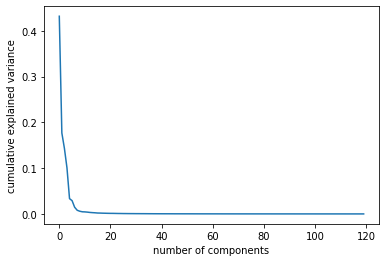

In [192]:
#Above model is overfitting, trying PCA again
#Scree plot for optimal number of components

plt.plot(pcaModel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [193]:
pcaModel=PCA(n_components=7)
pcaModel.fit(x.iloc[:,0:9])
x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])

In [194]:
pd.DataFrame(pcaModel.components_,columns=(x.iloc[:,0:9]).columns)

,X0,X1,X2,X3,X4,X5,X6,X8,X10
0,-0.042153,0.035592,0.995156,-0.014694,0.000004,-0.012677,0.018473,-0.076831,0.000411
1,0.024341,-0.012227,0.078629,-0.004005,0.000014,0.048981,0.012991,0.995234,0.000351
2,0.035595,-0.028134,-0.006720,-0.001503,0.000195,-0.997705,0.012257,0.048251,0.000197
3,0.987627,-0.137127,0.044013,-0.035763,-0.000073,0.037499,0.013118,-0.031478,0.002060
4,0.095527,0.579580,0.000486,0.083108,0.000052,-0.022142,-0.804529,0.016673,-0.004392
5,-0.106900,-0.794959,0.033852,-0.065497,0.000253,0.011054,-0.592491,-0.002900,0.000469
6,0.020035,-0.105369,0.018796,0.993620,-0.000288,0.002431,0.029043,0.000230,0.003537


In [195]:
pcaModel.explained_variance_ratio_.cumsum()

array([0.46841257, 0.660989  , 0.81698928, 0.92340284, 0.95783917,
       0.98855634, 0.99994622])

In [197]:
x_pca_c=pd.concat([x_pca_c,train_df.ID],axis=1)

In [198]:
x_non_pca=pd.concat([x.iloc[:,9:],train_df.ID],axis=1)

In [199]:
x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')

In [200]:
x_pca.drop(columns=['ID'],inplace=True)

In [201]:
x_pca

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.198954,1.616359,10.923829,-8.113448,0.214179,-4.076486,-3.490563,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.847106,1.893616,11.182094,-6.908097,-6.277695,1.698880,1.527916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.864642,12.133895,11.672028,-1.547777,-4.199876,2.962037,-0.133222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.317297,-6.761593,10.775261,-1.030741,-5.876388,1.635671,2.901362,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.798361,1.981552,10.858260,-2.653132,5.926119,-0.805132,1.722765,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,22.916251,-3.250404,9.907160,1.170713,-2.602643,4.128296,0.953919,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4204,21.713136,-6.626085,9.336919,-4.900983,2.640159,-1.761857,-3.142760,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,7.578831,8.296185,10.235139,-7.791041,-2.056715,-3.734564,1.900540,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4206,-15.148840,8.868998,10.956625,6.033811,3.172155,-2.929668,-1.338076,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [202]:
def perform_pca(df,x):
    pcaModel=PCA(n_components=7)
    pcaModel.fit(x.iloc[:,0:9])
    x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])
    x_pca_c=pd.concat([x_pca_c,df.ID],axis=1)
    x_non_pca=pd.concat([x.iloc[:,9:],df.ID],axis=1)
    x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')
    x_pca.drop(columns=['ID'],inplace=True)
    return x_pca

In [203]:
x_pca=perform_pca(train_df,x)

In [204]:
x_pca.head()

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.198954,1.616359,10.923829,-8.113448,0.214179,-4.076486,-3.490563,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.847106,1.893616,11.182094,-6.908097,-6.277695,1.698880,1.527916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.864642,12.133895,11.672028,-1.547777,-4.199876,2.962037,-0.133222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.317297,-6.761593,10.775261,-1.030741,-5.876388,1.635671,2.901362,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.798361,1.981552,10.858260,-2.653132,5.926119,-0.805132,1.722765,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=20,train_size=0.7)
xgbModel=XGBRegressor(max_depth=4, min_child_weight=5, reg_lambda=100, gamma = 200)
xgbModel.fit(x_train,y_train)
print(xgbModel.score(x_train,y_train))
print(xgbModel.score(x_test,y_test))

0.614560285632933
0.6199092032551441


In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
param_grid = {'reg_lambda': [100,200,500],'gamma':[100, 150, 200],'min_child_weight':[4,5,6]}

In [208]:
xgbModel_final=XGBRegressor(max_depth=4, min_child_weight=4, reg_lambda=100, gamma=150)

In [209]:
xgbModel_final.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=150, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=100, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [230]:
xgbModel_final.score(x_train,y_train)

0.6397577157407909

In [231]:
xgbModel_final.score(x_test,y_test)

0.6155810248715239

In [232]:
#Predicting outcome on test data

test_df = pd.read_csv('Merecedes_test.csv')

In [233]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [234]:
var_zero_cols(test_df)

['X257', 'X258', 'X295', 'X296', 'X369']

In [235]:
test_df.drop(columns=['X297', 'X11', 'X290', 'X293', 'X268', 'X233', 'X93', 'X289', 'X235', 'X107', 'X330', 'X347'],inplace=True)

In [236]:
transform_X0(test_df)

In [237]:
transform_X1(test_df)

In [238]:
transform_X5(test_df)

In [239]:
x=test_df.drop(columns=['ID'])

In [240]:
transform_labels(test_df,x)

In [241]:
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,5,9,34,5,3,0,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,11,3,8,0,3,0,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,9,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,6,34,5,3,0,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12,8,17,2,3,0,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [242]:
x_pca_t=perform_pca(test_df,x)

In [243]:
test_pred=pd.DataFrame(xgbModel_final.predict(x_pca_t),columns=['y'])

In [244]:
test_pred['ID']=test_df.ID

In [245]:
test_pred

,y,ID
0,76.399979,1
1,93.316437,2
2,78.363388,3
3,76.843262,4
4,110.597717,5
...,...,...
4204,104.243111,8410
4205,92.986168,8411
4206,91.162025,8413
4207,111.408897,8414
